In [1]:
import subprocess
import sys
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# 列出所有需要的套件
required_packages = [
    "numpy", 
    "pandas", 
    "scikit-learn", 
    "matplotlib", 

]

# 檢查並安裝每個缺失的套件
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        install(package)

# Kmean

* 1️ 產生模擬資料（3 個群）

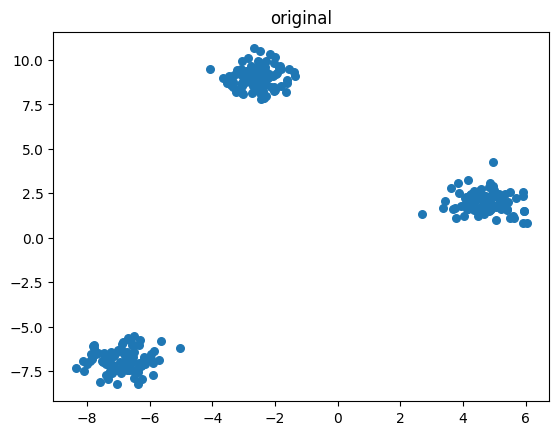

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# 可視化原始資料（未分群）
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("original")
plt.show()


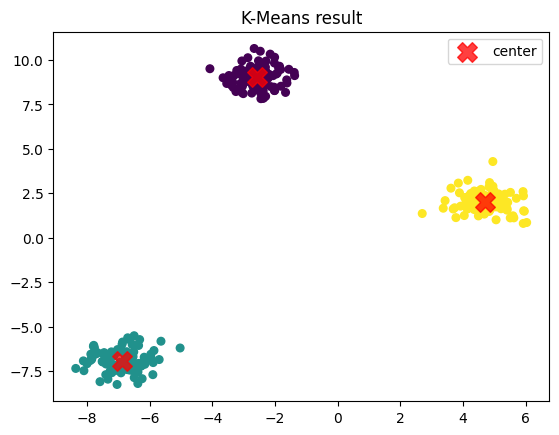

In [3]:

# 2️ 建立 KMeans 模型
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 3️ 取得分群結果與中心點
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# 4️ 可視化分群結果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='center')
plt.title("K-Means result")
plt.legend()
plt.show()


* 2️ 建立 KMeans 模型

In [4]:
# 1）生成範例資料；若已有資料，可改為載入自己的 X
X, _ = make_blobs(n_samples=300, centers=8, cluster_std=0.8, random_state=42)

MovieWriter imagemagick unavailable; using Pillow instead.


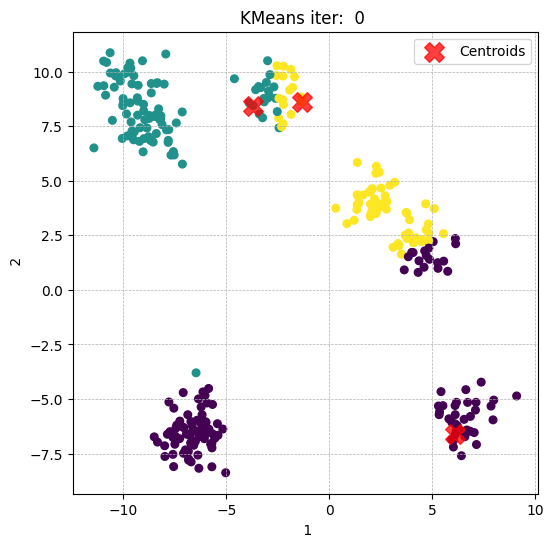

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs

# 自訂 KMeans，記錄每次迭代的中心點歷程

def kmeans_with_history(X, k, max_iters=100, tol=1e-4, random_state=42):
    rng = np.random.RandomState(random_state)
    # 隨機選 k 個初始中心
    centers = X[rng.choice(len(X), k, replace=False)]
    history = [centers.copy()]

    for i in range(max_iters):
        # 分配：每個點指派給距離最近的中心
        labels = np.argmin(cdist(X, centers), axis=1)
        # 更新：計算每個群的新中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        history.append(new_centers.copy())

        # 若中心點位移小於容差，則停止
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break
        centers = new_centers

    return history, labels


if __name__ == '__main__':


    # 2）執行 KMeans 並記錄歷程
    k = 3
    history, _ = kmeans_with_history(X, k=k, max_iters=50)

    # 3）建立動畫
    fig, ax = plt.subplots(figsize=(6, 6))

    def update(frame):
        ax.clear()
        centers = history[frame]
        labels = np.argmin(cdist(X, centers), axis=1)

        # 繪製資料點
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
        # 繪製中心點
        ax.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.75,
                   marker='X', c='red', label='Centroids')
        ax.set_title(f"KMeans iter:  {frame} ")
        ax.legend(loc='upper right')
        ax.set_xlabel(' 1')
        ax.set_ylabel(' 2')
        ax.grid(True, linestyle='--', linewidth=0.5)

    ani = FuncAnimation(fig, update, frames=len(history), interval=800, repeat=False)

    # 若要將動畫儲存為 GIF ，可取消以下註解：
    ani.save('kmeans_animation.gif', writer='imagemagick', fps=2)



MovieWriter imagemagick unavailable; using Pillow instead.


Done


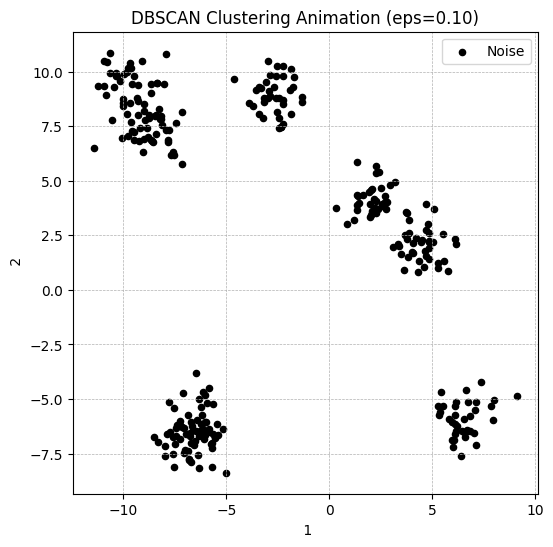

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 設定一系列 eps 值，並定義 min_samples
eps_values = np.linspace(0.1, 1.5, 30)
min_samples = 5

# 對每個 eps 執行 DBSCAN，並記錄標籤
histories = []
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    histories.append((eps, labels))

# 建立動畫
fig, ax = plt.subplots(figsize=(6, 6))

def update(frame):
    ax.clear()
    eps, labels = histories[frame]
    unique_labels = set(labels)
    for lbl in unique_labels:
        mask = (labels == lbl)
        if lbl == -1:
            ax.scatter(X[mask, 0], X[mask, 1], c='black', s=20, label='Noise')
        else:
            ax.scatter(X[mask, 0], X[mask, 1], s=50, label=f'Cluster {lbl}')
    ax.set_title(f'DBSCAN Clustering Animation (eps={eps:.2f})')
    ax.set_xlabel(' 1')
    ax.set_ylabel(' 2')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', linewidth=0.5)

ani = FuncAnimation(fig, update, frames=len(histories), interval=800, repeat=False)

# 如需儲存為 GIF 或 MP4，可取消以下註解：
ani.save('dbscan_animation.gif', writer='imagemagick', fps=2)
print("Done")


# 線性擬和

* 讀取資料

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#Pandas是用於資料操縱和分析的Python軟體庫。它建造在NumPy基礎上，並為操縱數值表格和時間序列，提供了資料結構和運算操作。
#Scikit-learn（曾叫做scikits.learn與sklearn）是用於Python程式語言的自由軟體機器學習庫。
#它包含了各種分類、回歸和聚類算法，包括多層感知器、支持向量機、隨機森林、梯度提升、k-平均聚類和DBSCAN
#matplotlib 畫圖與秀圖

# 讀取數據
data = pd.read_csv(r"C:\Users\User\Desktop\清大\ml\1.csv")

# 分割特徵和目標變量
X = data[['X']]  # 特徵矩陣
y = data['Y']     # 目標變量

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)




* 創建模型並使用

In [8]:
# 創建線性回歸模型實例
model = LinearRegression()

# 擬合模型
model.fit(X_train, y_train)

# 預測測試集的結果
y_pred = model.predict(X_test)


In [9]:
# 計算性能指標
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印性能指標
print("斜率（權重）w:", model.coef_)
print("截距 b:", model.intercept_)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

斜率（權重）w: [0.28378332]
截距 b: 0.2521289054956415
Mean Squared Error: 1.8522262671719858
R^2 Score: 0.21881071694186505


* 製圖

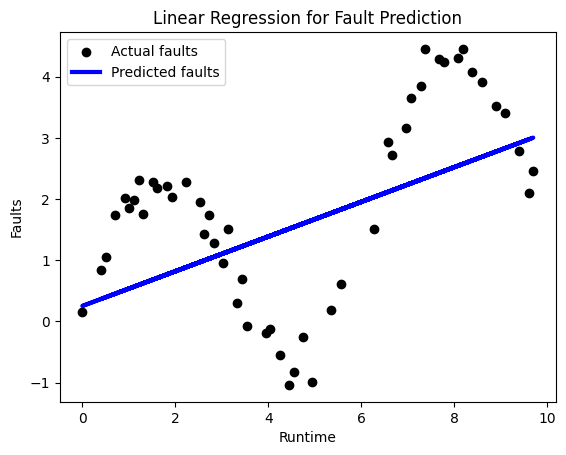

In [10]:
# 繪製觀測值
plt.scatter(X_test, y_test, color='black', label='Actual faults')

# 繪製預測值
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted faults')

# 設定圖標題和軸標籤
plt.title('Linear Regression for Fault Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')

# 顯示圖例
plt.legend()

# 顯示圖表
plt.show()

# 非線性回歸

* 函式庫

In [11]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

* 讀取資料 

In [12]:
# 讀取數據
data = pd.read_csv(r"C:\Users\User\Desktop\清大\ml\1.csv")

# 分割特徵和目標變量
X = data[['X']]  # 特徵矩陣
y = data['Y']     # 目標變量

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


* 建立模型

In [16]:
# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建一個多項式特徵生成器
degree = 5
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 擬合模型
polyreg.fit(X_train, y_train)

# 預測測試集的結果
y_pred = polyreg.predict(X_test)

In [17]:
# 計算性能指標
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印性能指標
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.28273377322376414
R^2 Score: 0.9132423743826421


* 製圖

c:\Users\User\Desktop\envtest\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


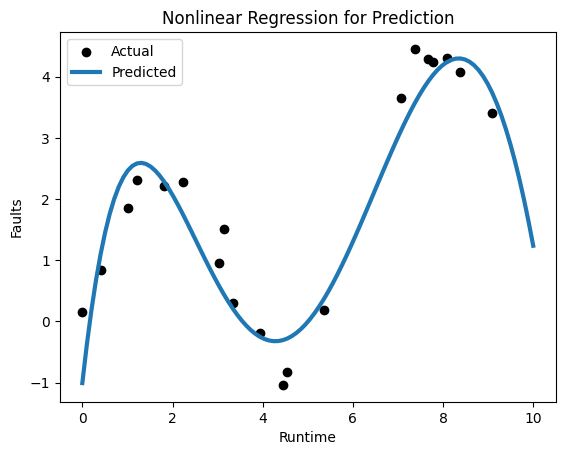

In [18]:
# 繪製觀測值
plt.scatter(X_test, y_test, color='black', label='Actual')

# 產生平滑曲線的輸入
X_fit = np.linspace(X.min(), X.max(), 100)
y_fit = polyreg.predict(X_fit)

# 繪圖
plt.plot(X_fit, y_fit, linewidth=3, label='Predicted')
plt.title('Nonlinear Regression for Prediction')
plt.xlabel('Runtime')
plt.ylabel('Faults')
plt.legend()
plt.show()
